In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [79]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

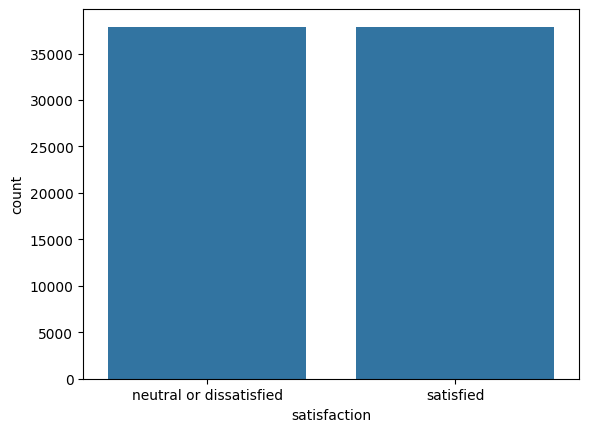

In [80]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [81]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,26,1127,0
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,28,1532,0
75777,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,38,3496,3
75778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,31,1919,0


In [82]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
75778    neutral or dissatisfied
75779    neutral or dissatisfied
Name: satisfaction, Length: 75780, dtype: object

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53046, 77) and test set is :(22734, 77)


In [84]:
from sklearn.preprocessing import MinMaxScaler
# ใช้ MinMaxScaler แปลง X_train ให้อยู่ในช่วง 0 ถึง 1
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[0.        , 0.        , 0.        , ..., 0.43589744, 0.30972194,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.28205128, 0.47960219,
        0.9       ],
       [0.        , 1.        , 0.        , ..., 0.28205128, 0.32778567,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.35897436, 0.45443475,
        0.43333333],
       [0.        , 1.        , 0.        , ..., 0.20512821, 0.50010148,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.34615385, 0.16480617,
        0.        ]])

## Set paramiter CV

In [85]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Naive-Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB

# ฟิตโมเดลด้วยข้อมูลที่ถูกแปลงแล้ว
model_naive = MultinomialNB()

start_time = time.time()  # เวลาเริ่มต้น
model_naive.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_NB = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.181705 วินาที


In [87]:

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test)

accuracy_NB=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 85.89 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.84      0.86     11333
              satisfied       0.85      0.87      0.86     11401

               accuracy                           0.86     22734
              macro avg       0.86      0.86      0.86     22734
           weighted avg       0.86      0.86      0.86     22734



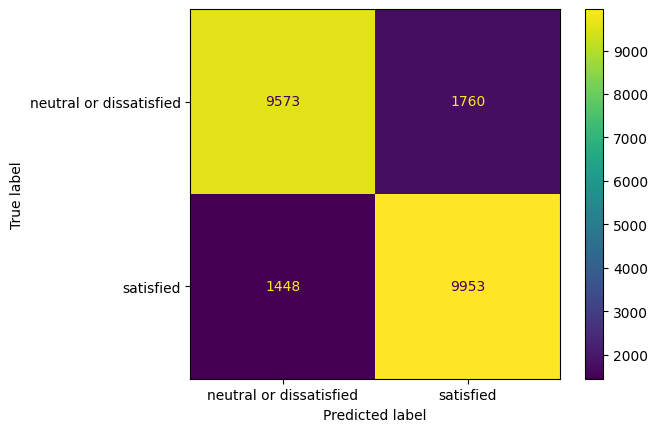

In [88]:
cm_2= confusion_matrix(y_test, y_pred_naive, labels=model_naive.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_naive.classes_)
disp_2.plot()

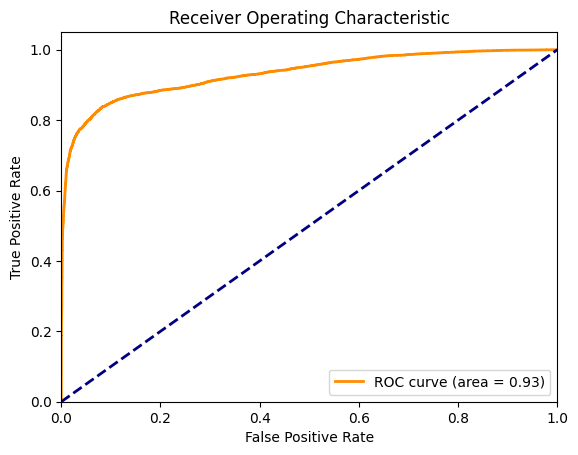

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_naive.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [90]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_nb = cross_val_score(model_naive, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (NB): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_NB = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_NB:.6f} วินาที")


Cross Validation Scores (NB): [0.86316087 0.85185185 0.85863726 0.85609273 0.85778909 0.85326548
 0.87075792 0.85520362 0.86170814 0.85576923 0.864819   0.86001131
 0.86029412 0.86340498 0.85888009]
Mean CV Accuracy: 0.8594
Standard Deviation CV Accuracy: 0.0047
เวลาที่ใช้ในการทำ Cross Validation: 7.390356 วินาที


In [91]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_naive.predict(X_train))
test_accuracy = accuracy_score(y_test, model_naive.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8599517399992459
Test Accuracy: 0.858889768628486


## Save Model Predic

In [92]:
import pickle
pickle_out = open("../../pipelines/model_NB_business.pkl", mode = "wb")
pickle.dump(model_naive, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_NB.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [93]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
6828,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,43,697,10,satisfied
49488,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,40,2613,6,satisfied
18123,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,57,3403,0,satisfied
26268,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,48,3655,0,satisfied
29829,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,21,2099,0,neutral or dissatisfied
53155,0,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,1,40,1346,0,satisfied
63462,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,60,3346,0,neutral or dissatisfied
8009,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,54,834,0,satisfied
36407,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,45,2673,0,satisfied
67943,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,41,2957,0,neutral or dissatisfied


In [94]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
6828,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,43,697,10
49488,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,40,2613,6
18123,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,57,3403,0
26268,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,48,3655,0
29829,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,21,2099,0
53155,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,1,40,1346,0
63462,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,60,3346,0
8009,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,54,834,0
36407,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,45,2673,0
67943,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,41,2957,0


In [95]:
y_sam = df_sam.iloc[:,-1]
y_sam


6828                   satisfied
49488                  satisfied
18123                  satisfied
26268                  satisfied
29829    neutral or dissatisfied
53155                  satisfied
63462    neutral or dissatisfied
8009                   satisfied
36407                  satisfied
67943    neutral or dissatisfied
22251                  satisfied
36560    neutral or dissatisfied
21910                  satisfied
48764                  satisfied
73116    neutral or dissatisfied
22634                  satisfied
41826    neutral or dissatisfied
1776                   satisfied
33875                  satisfied
25509                  satisfied
Name: satisfaction, dtype: object

In [96]:
model = pickle.load(open("../../pipelines/model_NB_business.pkl", 'rb'))
scaler_NB = pickle.load(open("../../pipelines/scaler_NB.pkl", 'rb'))

scaler_new = scaler_NB.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_NB=accuracy_score(preds,y_sam)
print(f"Accuracy of NB is : {round(accuracy_NB*100,2)} % .")

['satisfied' 'satisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'satisfied' 'satisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied']
Accuracy of NB is : 80.0 % .
